In [2]:
# below models have been tried here

# linear regression sklearn - without scaling

# mae: 2880.1259518943825
# mse: 28204383.943942167
# rmse: 5310.77997510179
# r_squared:0.5416017854490166
# adjusted_r_squared: 1.715101214699534

# linear regression sklearn - with scaling - EXTREMLY POOR

# mae: 341448479914835.4
# mse: 2.739411292448198e+30
# rmse: 1655116700552622.0
# r_squared:-5.0681090110711715e+22
# adjusted_r_squared: 7.906250057271028e+22

# decision tree sklearn - without scaling

# mae: 1688.4
# mse: 7149545.4
# rmse: 2673.8633846926436
# r_squared:0.8838003746961786
# adjusted_r_squared: 1.1812714154739614

# decision tree sklearn - with scaling 

# mae: 1718.3875
# mse: 5946545.20625
# rmse: 2438.5539170274665
# r_squared:0.8899846130166027
# adjusted_r_squared: 1.1716240036940997

# random forest sklearn - without scaling

# mae: 1073.3567083333332
# mse: 2220170.1759186806
# rmse: 1490.0235487799114
# r_squared:0.9639161753483697
# adjusted_r_squared: 1.0562907664565433

# random forest sklearn - with scaling

# mae: 1614.9289624999997
# mse: 4686009.391844128
# rmse: 2164.7192408818582
# r_squared:0.9133054372293807
# adjusted_r_squared: 1.135243517922166

# xgboost sklearn - without scaling

# mae: 1120.7487670898438
# mse: 2344952.2819912257
# rmse: 1531.3237025499297
# r_squared:0.9618881255691136
# adjusted_r_squared: 1.0594545241121827

# xgboost sklearn - with scaling

# mae: 1674.6705322265625
# mse: 5732040.92997775
# rmse: 2394.1681081281135
# r_squared:0.893953097261687
# adjusted_r_squared: 1.1654331682717682

# hyper-parameter tuned xgboost sklearn - without scaling

# mae: 1043.07587890625
# mse: 1901365.0879912735
# rmse: 1378.8999557586742
# r_squared:0.9690976281106833
# adjusted_r_squared: 1.048207700147334

# hyper-parameter tuned xgboost sklearn - with scaling

# mae: 1255.1245239257812
# mse: 3455015.189443725
# rmse: 1858.7671154406958
# r_squared:0.9360797202549364
# adjusted_r_squared: 1.0997156364022993

# xgboost sagemaker - without scaling

# mae: 1356.6128
# mse: 3168216.0
# rmse: 1779.9484
# r_squared:0.9434444428594699
# adjusted_r_squared: 1.0882266691392268

# xgboost sagemaker - with scaling

# mae: 1767.4299
# mse: 7599774.5
# rmse: 2756.7688
# r_squared:0.9010604156510177
# adjusted_r_squared: 1.1543457515844124

# hyper-parameter tuned xgboost sagemaker - without scaling - not good results - should improve by running more jobs, trying different params

# mae: 2519.69
# mse: 13253186.0
# rmse: 3640.4924
# r_squared:0.7634184959243031
# adjusted_r_squared: 1.3690671463580872

# hyper-parameter tuned xgboost sagemaker - with scaling 

# mae: 4266.7393
# mse: 36552550.0
# rmse: 6045.8706
# r_squared:0.5241314102567739
# adjusted_r_squared: 1.7423549999994328

# autogluon sagemaker - without scaling

# mae: 766.69775390625
# mse: 1092818.359427929
# rmse: 1045.3795288927026
# r_squared:0.9636702709104488
# adjusted_r_squared: 1.0566743773796998

# autogluon sagemaker - with scaling

# mae: 1329.1794189453126
# mse: 3177901.8014270305
# rmse: 1782.6670472713154
# r_squared:0.9194616994801666
# adjusted_r_squared: 1.12563974881094

# the best model in terms of R2 alone is hyper-parameter tuned xgboost sklearn -> 0.9690976281106833
# for this model, mae: 1043.07587890625 and rmse: 1378.8999557586742
# the best model in terms of mae and rmse is autogluon sagemaker. R2 is close to above model -> 0.9636702709104488
# for this model, mae: 766.69775390625 and rmse: 1045.3795288927026

# Final conclusion

# Taking into consideration both R2 and the error metrics, we can conclude autogluon sagemaker as the final model
# We are able to predict the car price with an error margin of 1000$
# Also scaling does not help - in all the cases we are getting better metrics without scaling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#  there is no header in the data file

data = pd.read_csv('imports-85.data', header = None)

In [5]:
# assign header columns to the dataframe

data.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
               'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 
               'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
               'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [6]:
# number of rows

data.count()

symboling            205
normalized_losses    205
make                 205
fuel_type            205
aspiration           205
num_of_doors         205
body_style           205
drive_wheels         205
engine_location      205
wheel_base           205
length               205
width                205
height               205
curb_weight          205
engine_type          205
num_of_cylinders     205
engine_size          205
fuel_system          205
bore                 205
stroke               205
compression_ratio    205
horsepower           205
peak_rpm             205
city_mpg             205
highway_mpg          205
price                205
dtype: int64

In [7]:
# take a look at the data

pd.set_option('display.max_colwidth', None)
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# has a mix of categorical and numeric columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [9]:
# deep-dive into numeric columns

data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
# any nulls in data

data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
# segregate the numeric columns

numeric_columns = data.select_dtypes(include = np.number)
numeric_columns

# numeric_column_names = numeric_columns.columns
# numeric_column_names

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [12]:
# segregate the categorical columns

categorical_columns = data.select_dtypes(include = object)
categorical_columns

# categorical_column_names = categorical_columns.columns
# categorical_column_names

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800,22470


In [13]:
# some of the numeric columns have been marked as categorical
# so tried to conver these columns to float data type
# upon trying this, data = data.astype({'bore':'float','stroke':'float'})
# came to know that ? in the data columns was resulting in this erroneous categorization
# so replaced ? with null. this can be done for the entire df instead of column by column

# we then replace the nulls with meean value of each column
# note that, even though ? can be replaced with null at a df level, 
# replacing the null values with mean value has to be done column by column

In [14]:
data['bore'] = data['bore'].replace(['?'], np.nan)

In [15]:
data = data.astype({'bore':'float'})

In [16]:
mean_value_bore = data['bore'].mean()

In [17]:
data['bore'].fillna(value=mean_value_bore, inplace=True)

In [18]:
data['stroke'] = data['stroke'].replace(['?'], np.nan)

In [19]:
data = data.astype({'stroke':'float'})

In [20]:
mean_value_stroke = data['stroke'].mean()

In [21]:
# mean_value_stroke

In [22]:
data['stroke'].fillna(value=mean_value_stroke, inplace=True)

In [23]:
data['horsepower'] = data['horsepower'].replace(['?'], np.nan)

In [24]:
data = data.astype({'horsepower':'float'})

In [25]:
mean_value_horsepower = data['horsepower'].mean()

In [26]:
data['horsepower'].fillna(value=mean_value_horsepower, inplace=True)

In [27]:
data['peak_rpm'] = data['peak_rpm'].replace(['?'], np.nan)

In [28]:
data = data.astype({'peak_rpm': 'float'})

In [29]:
mean_value_peak_rpm = data['peak_rpm'].mean()

In [30]:
data['peak_rpm'].fillna(value=mean_value_peak_rpm, inplace=True)

In [31]:
data['normalized_losses'] = data['normalized_losses'].replace(['?'], np.nan)

In [32]:
data = data.astype({'normalized_losses':'float'})

In [33]:
mean_value_normalized_losses = data['normalized_losses'].mean()

In [34]:
data['normalized_losses'].fillna(value=mean_value_normalized_losses, inplace=True)

In [35]:
# for price, which is the label we are trying to predict, we will not replace with mean
# we will drop those rows

In [36]:
data[data['price'] == '?']

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,?
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,?
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,?
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,?


In [37]:
data[data['price'] == '?'].index

Int64Index([9, 44, 45, 129], dtype='int64')

In [38]:
idx_price = data[data['price'] == '?'].index

In [39]:
data.drop(idx_price , inplace = True)

In [40]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [41]:
# once again check the numeric and categorical columns

In [42]:
# segregate the numeric columns

numeric_columns = data.select_dtypes(include = np.number)
numeric_columns

# numeric_column_names = numeric_columns.columns
# numeric_column_names

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [43]:
# price was still not showing up above

data = data.astype({'price': 'float'})

In [44]:
# segregate the numeric columns

numeric_columns = data.select_dtypes(include = np.number)
numeric_columns

numeric_column_names = numeric_columns.columns
numeric_column_names

numeric_column_names_except_target = []
for numeric_column_name in numeric_column_names:
    if numeric_column_name != 'price':
        numeric_column_names_except_target.append(numeric_column_name)
        
numeric_column_names_except_target

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [45]:
# segregate the categorical columns

categorical_columns = data.select_dtypes(include = object)
categorical_columns

categorical_column_names = categorical_columns.columns
categorical_column_names

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [46]:
# checking couple of columns if they need to be convreted to their numeric values
# not doing it in the first round
# anyway these are categorical values - numeric or in words shouldnt matter
# they will encoded anyways

In [47]:
data['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [48]:
data['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [49]:
data['num_of_doors'] == '?'

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: num_of_doors, Length: 201, dtype: bool

In [50]:
data[data['num_of_doors'] == '?'].index

Int64Index([27, 63], dtype='int64')

In [51]:
idx_num_doors = data[data['num_of_doors'] == '?'].index

In [52]:
data.drop(idx_num_doors, inplace = True)

In [53]:
# visualization

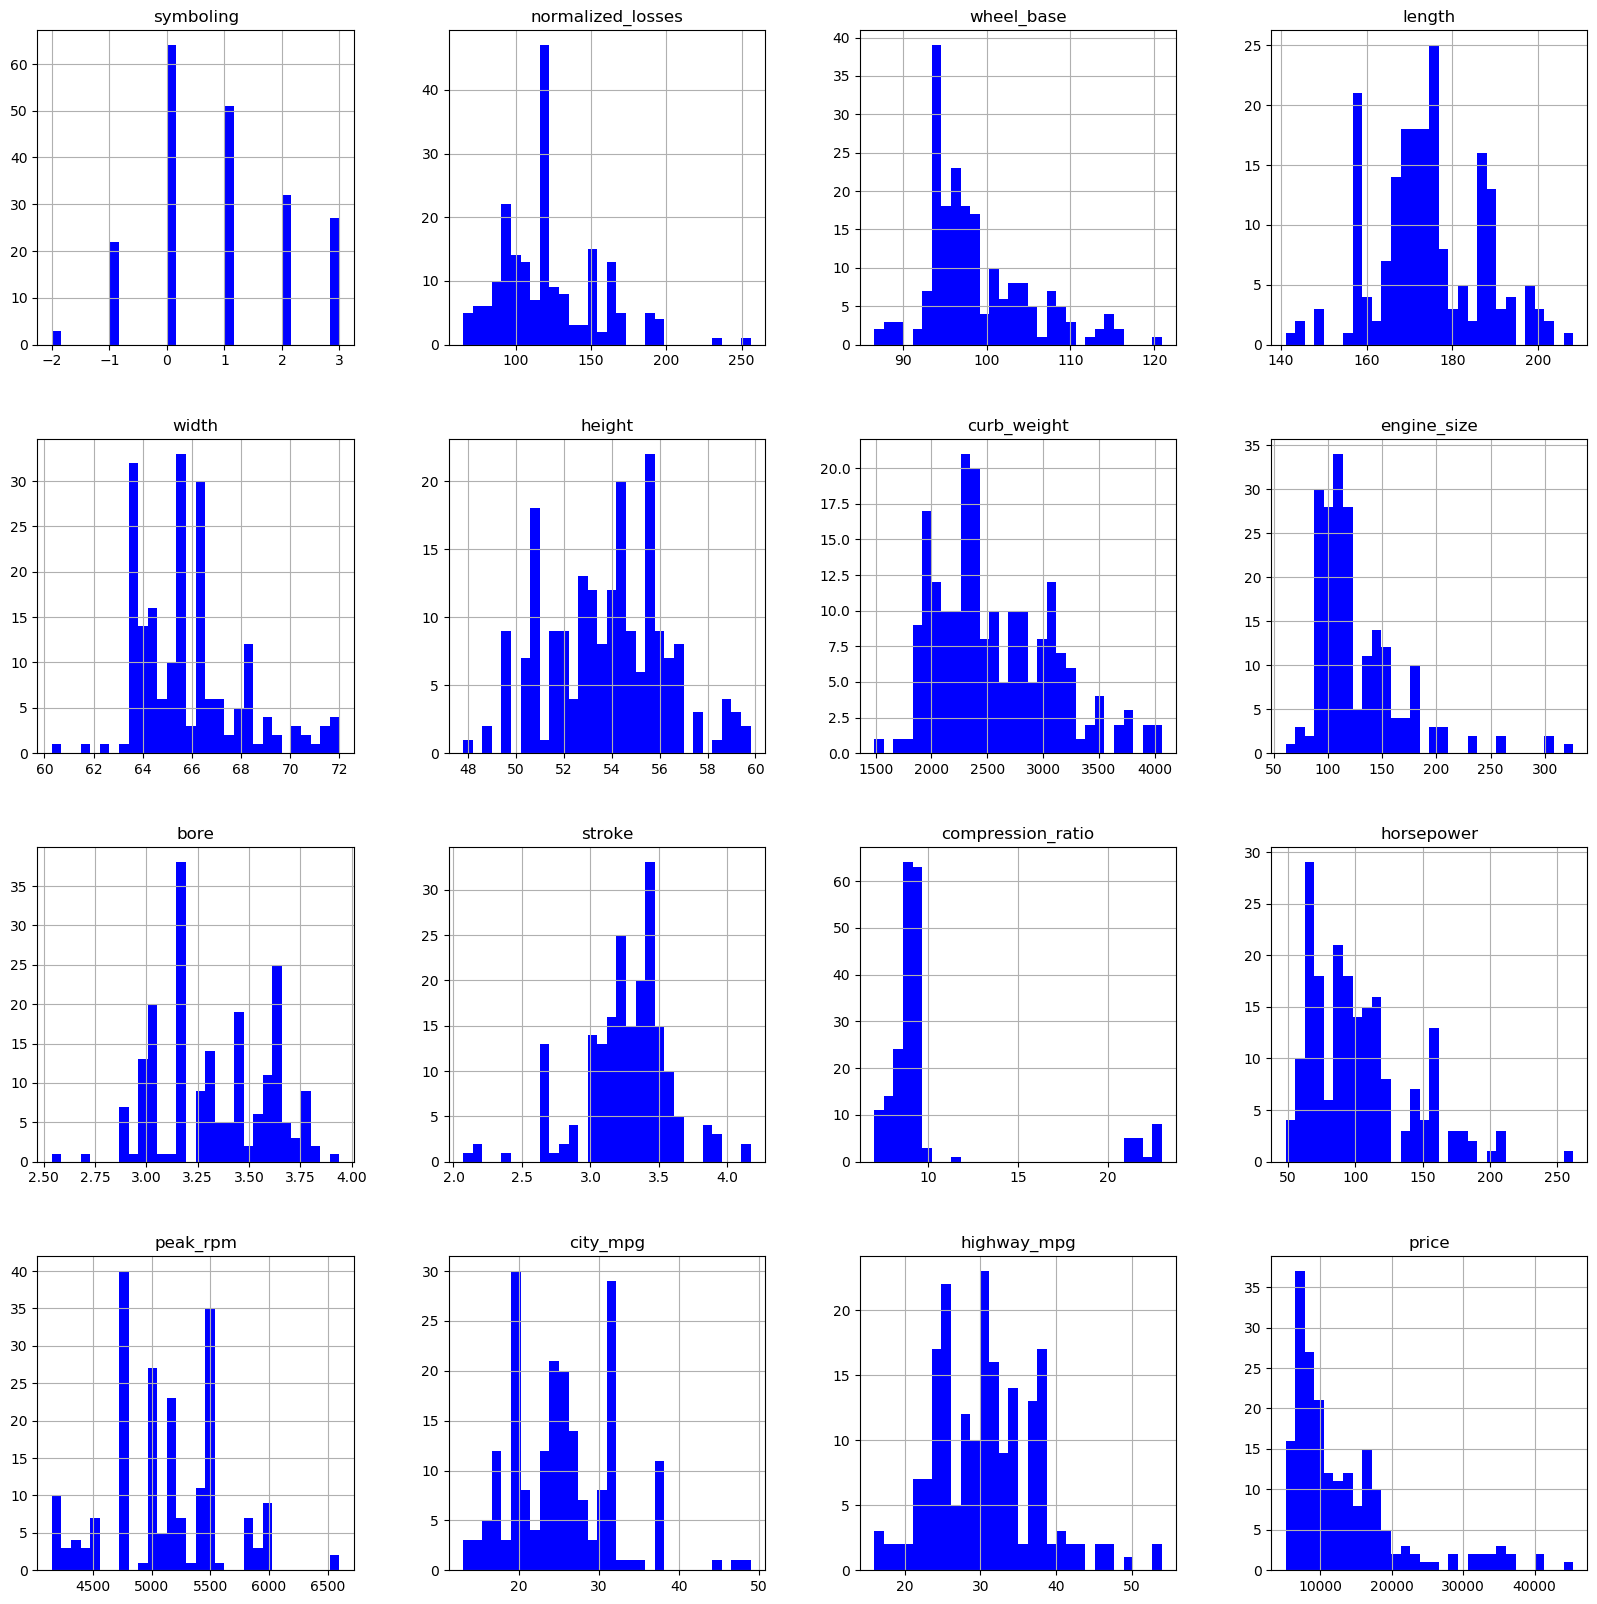

In [54]:
# histogram
# interesting to note that symboling is categorical variable even though it hs numeric values

data.hist(bins = 30, figsize = (20, 20), color = 'b')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


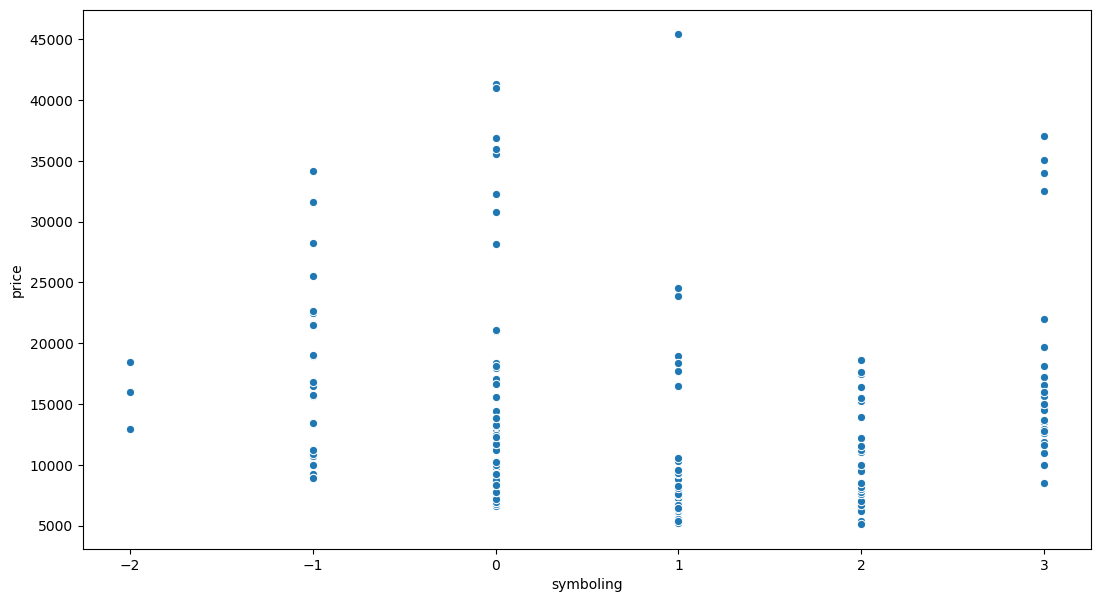

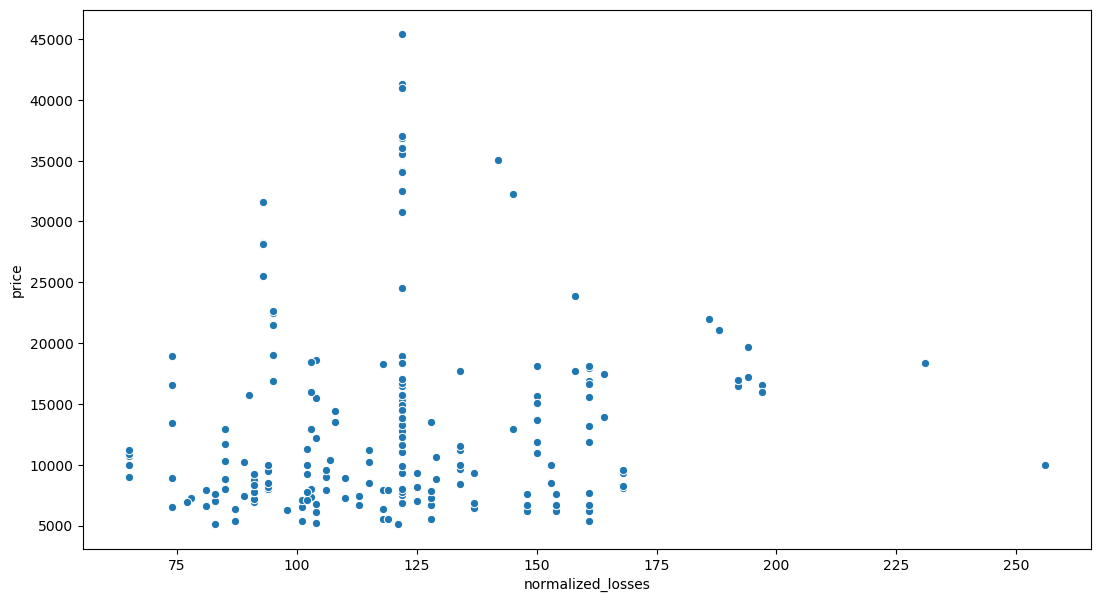

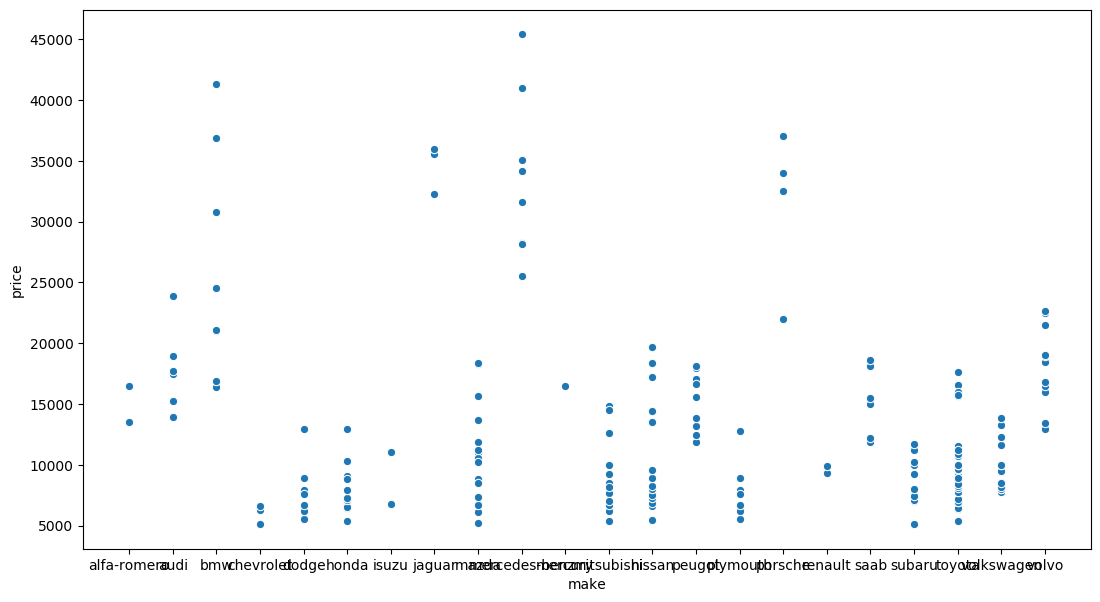

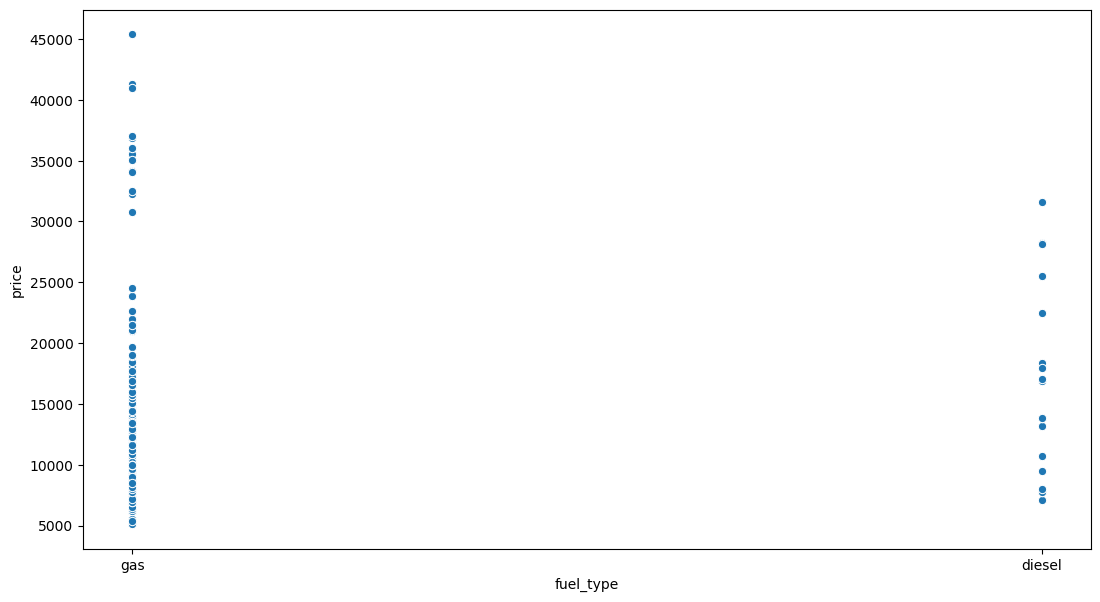

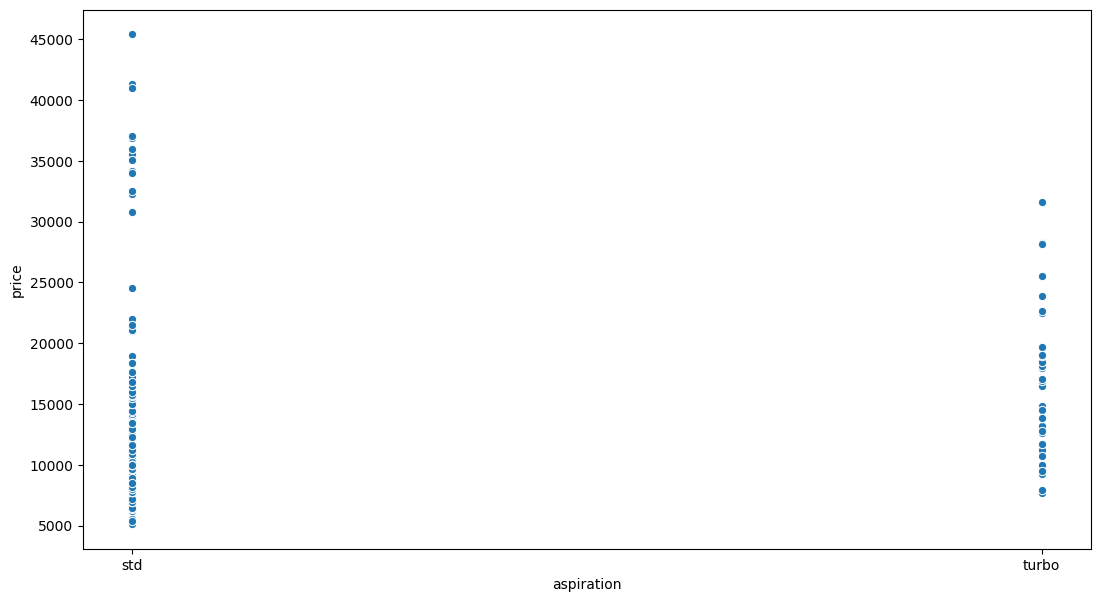

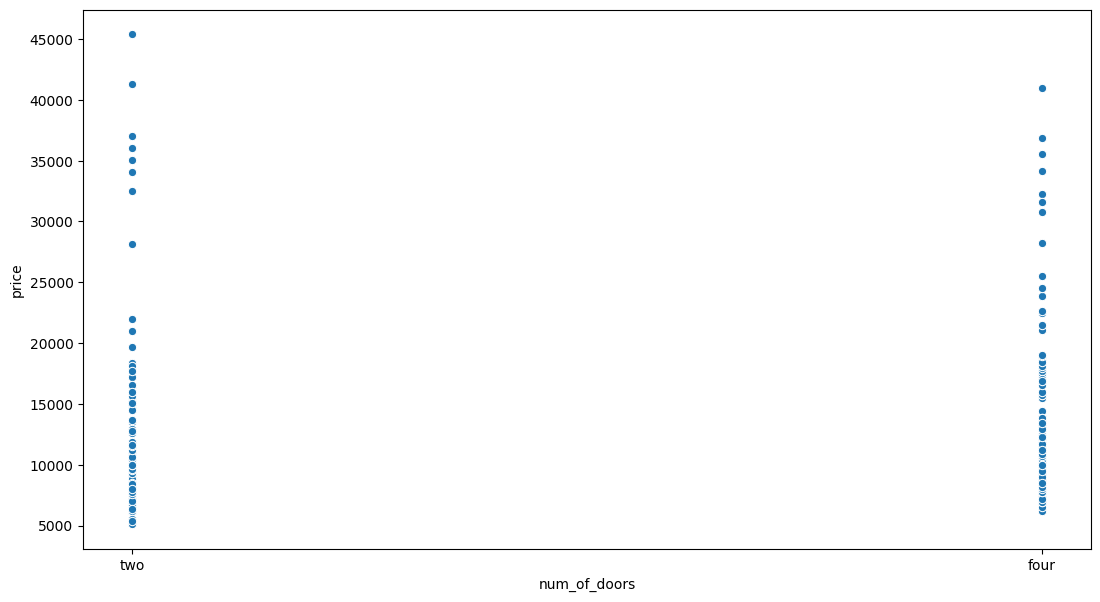

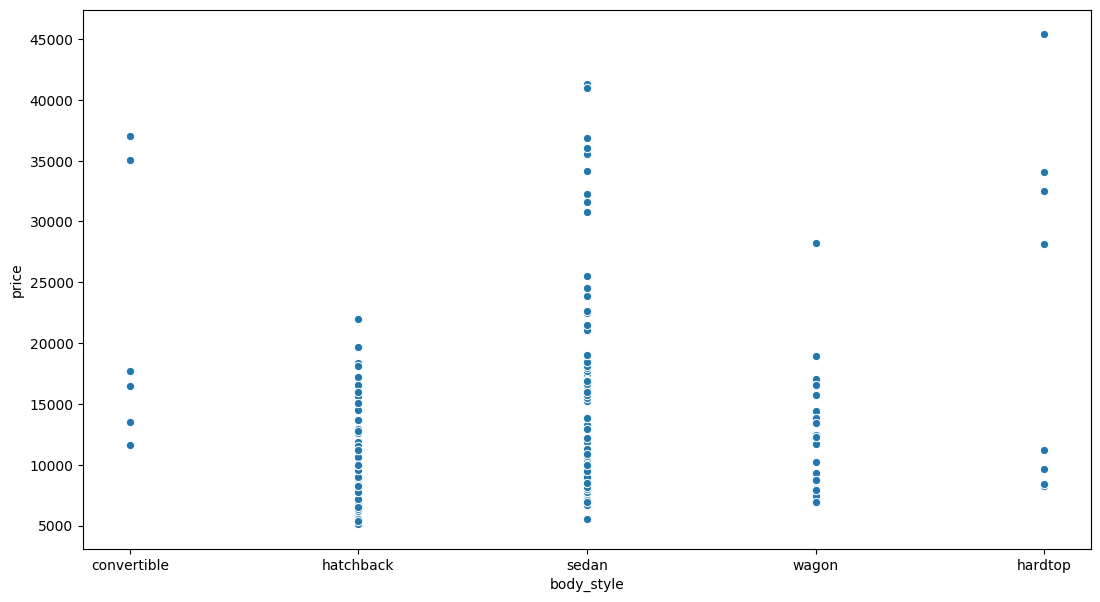

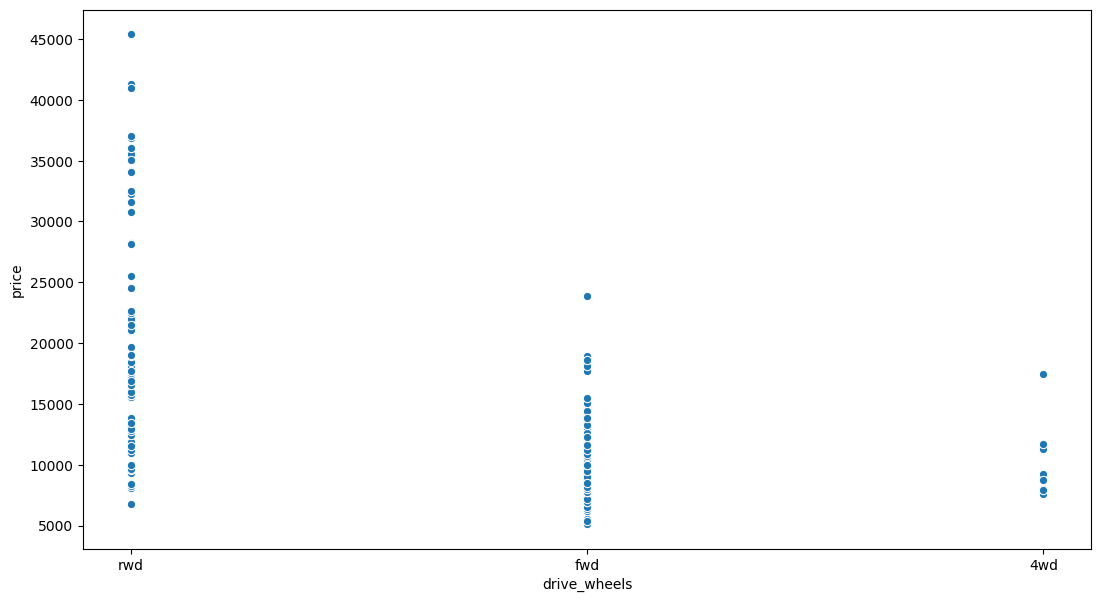

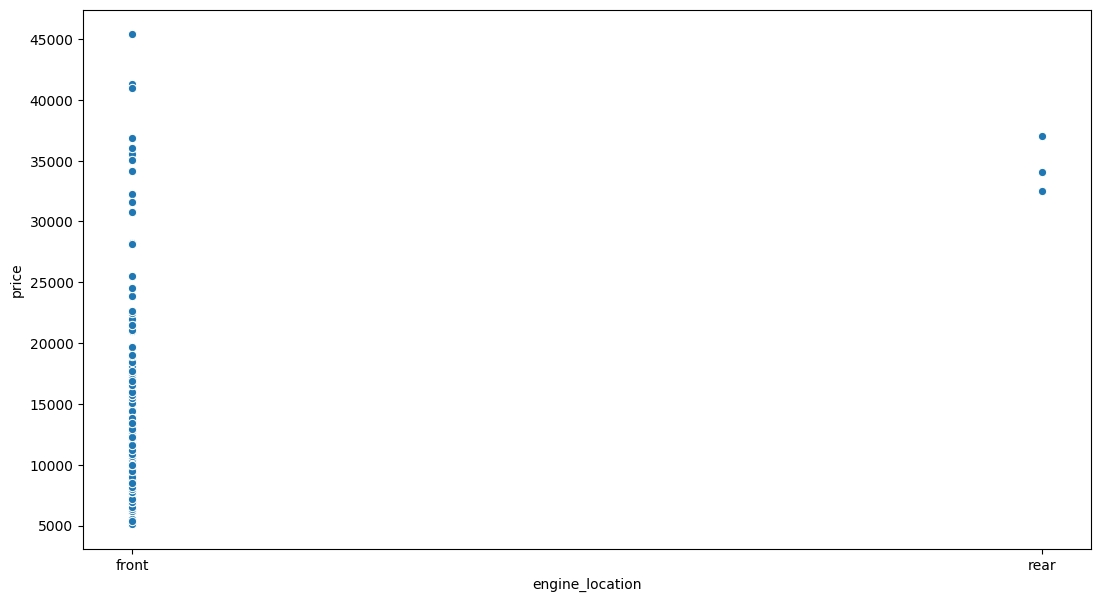

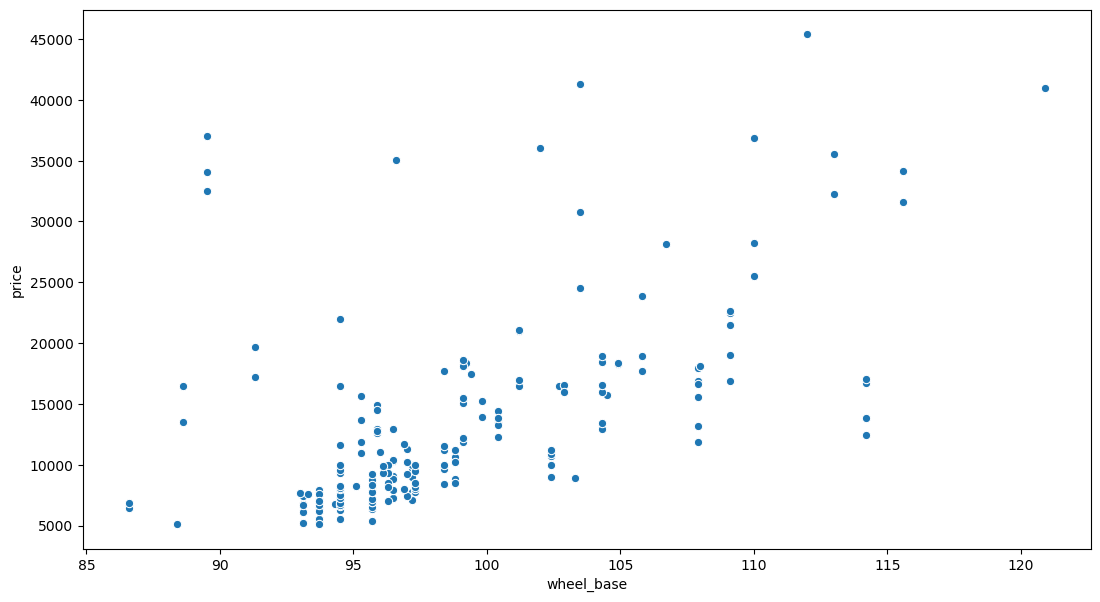

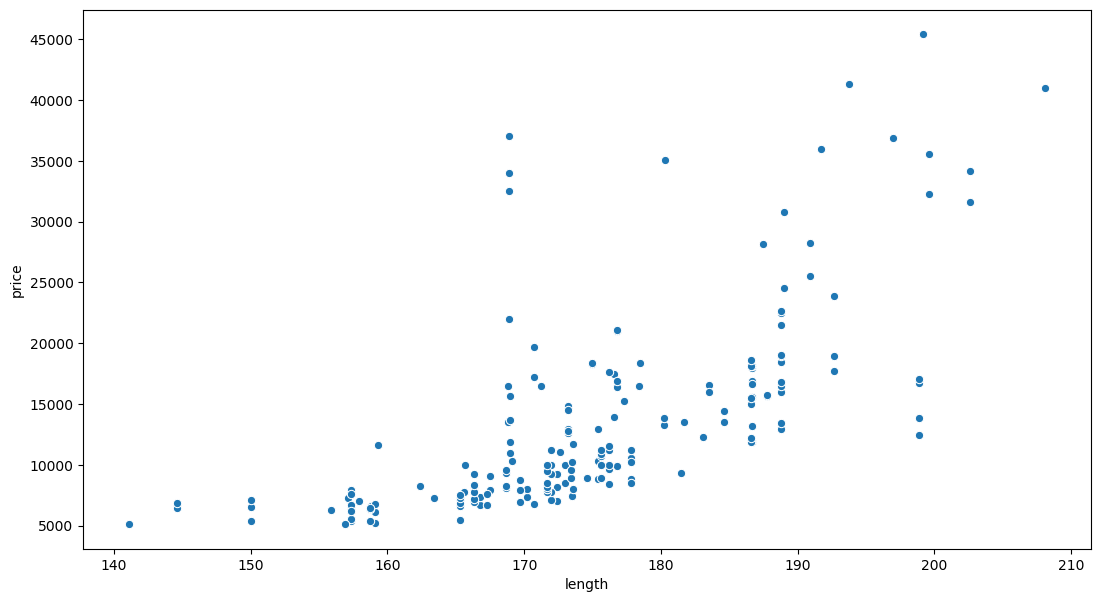

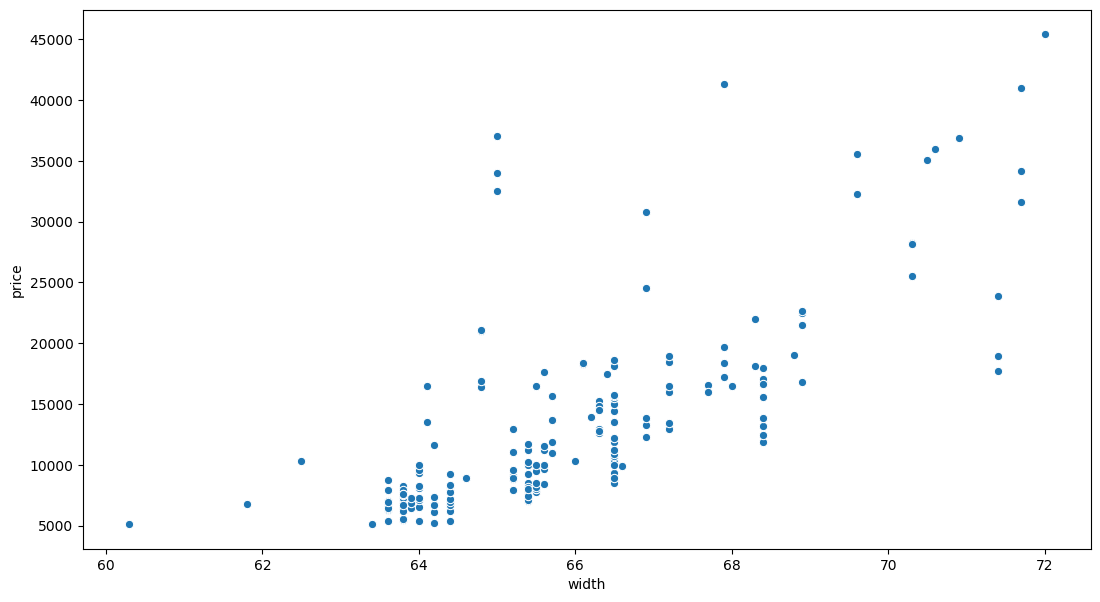

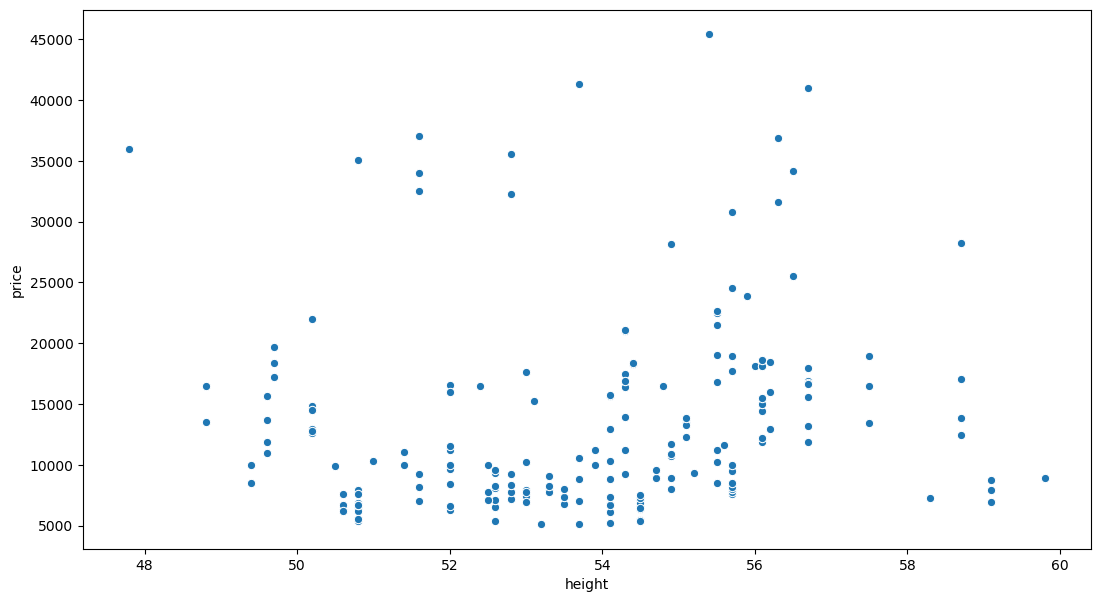

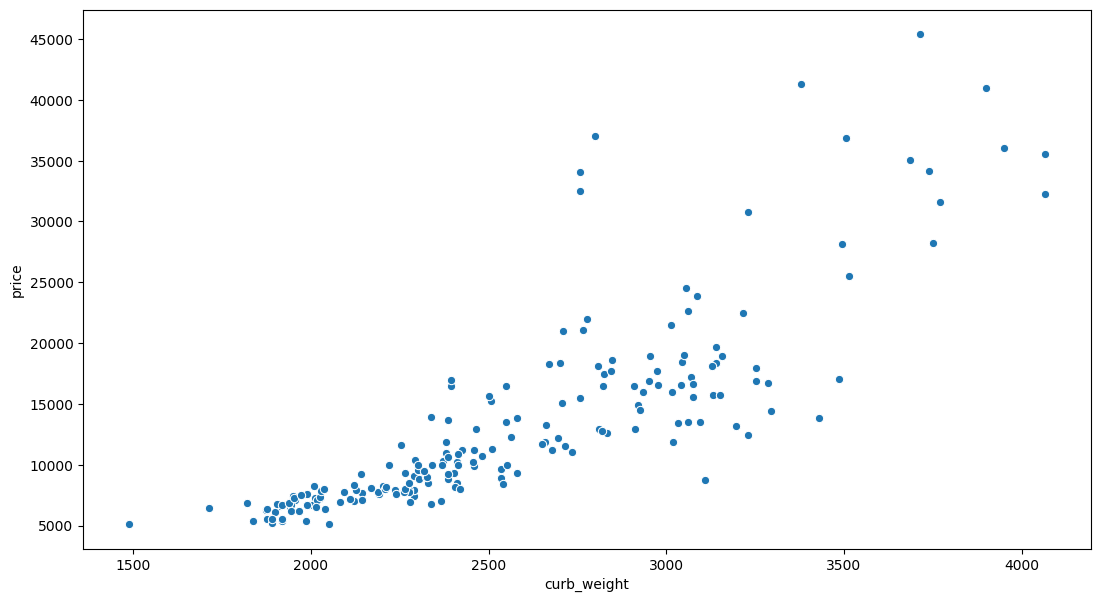

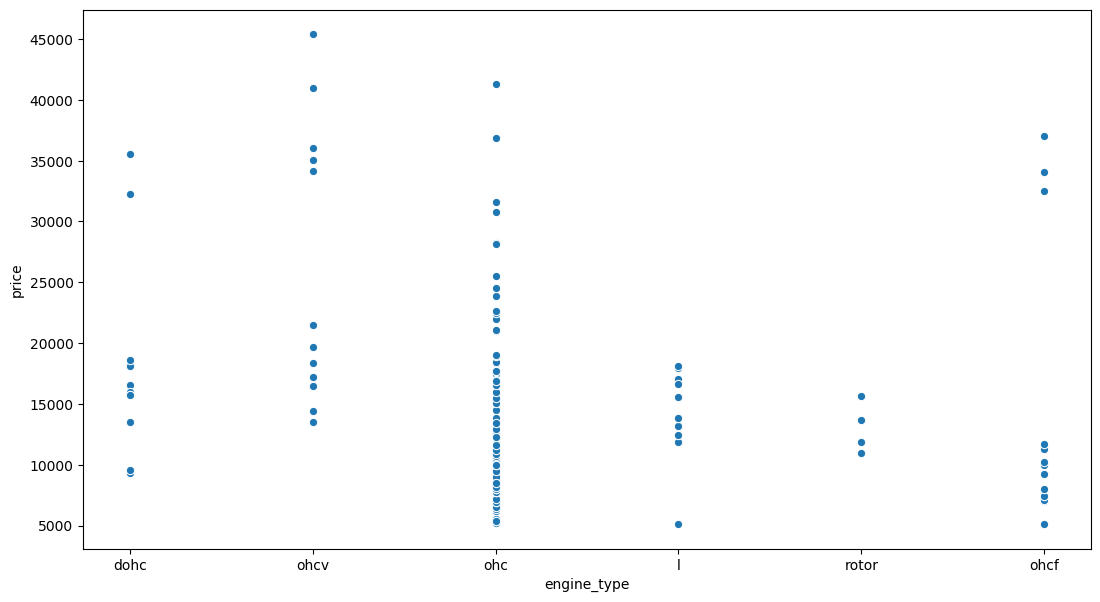

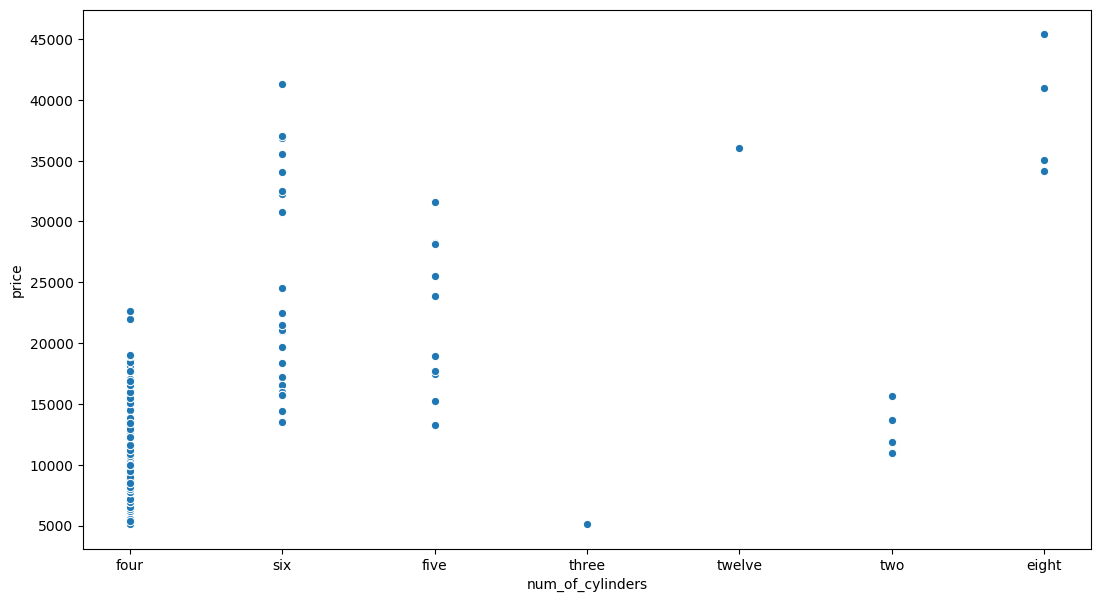

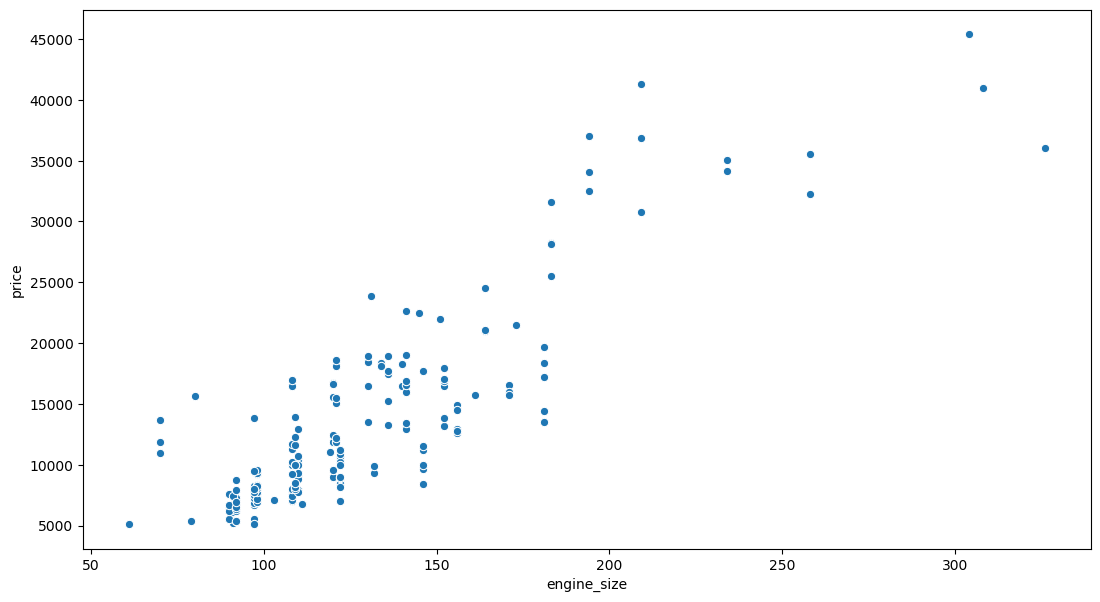

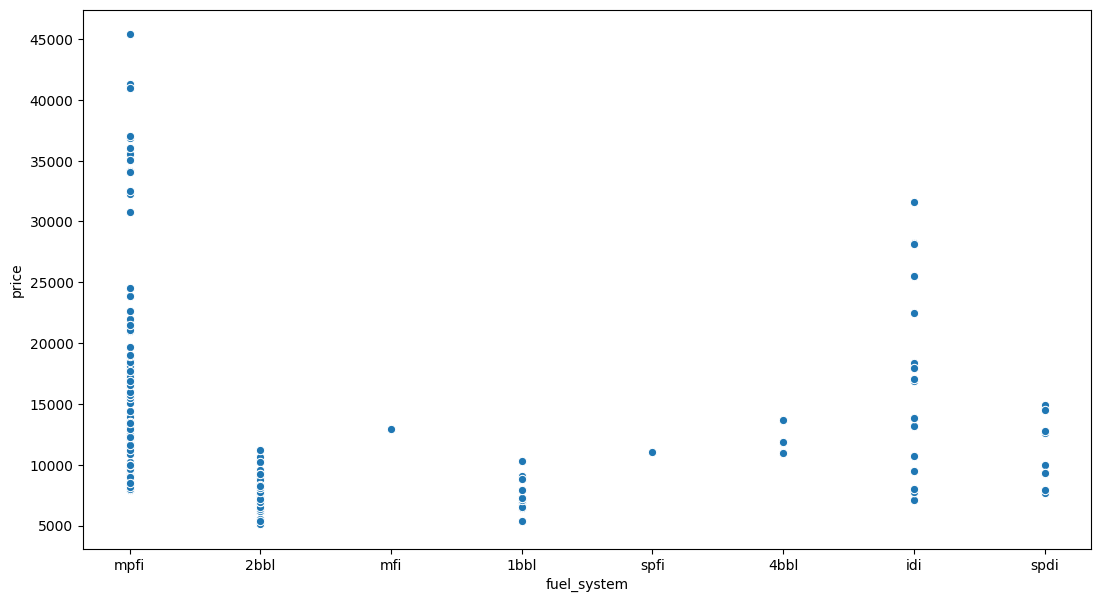

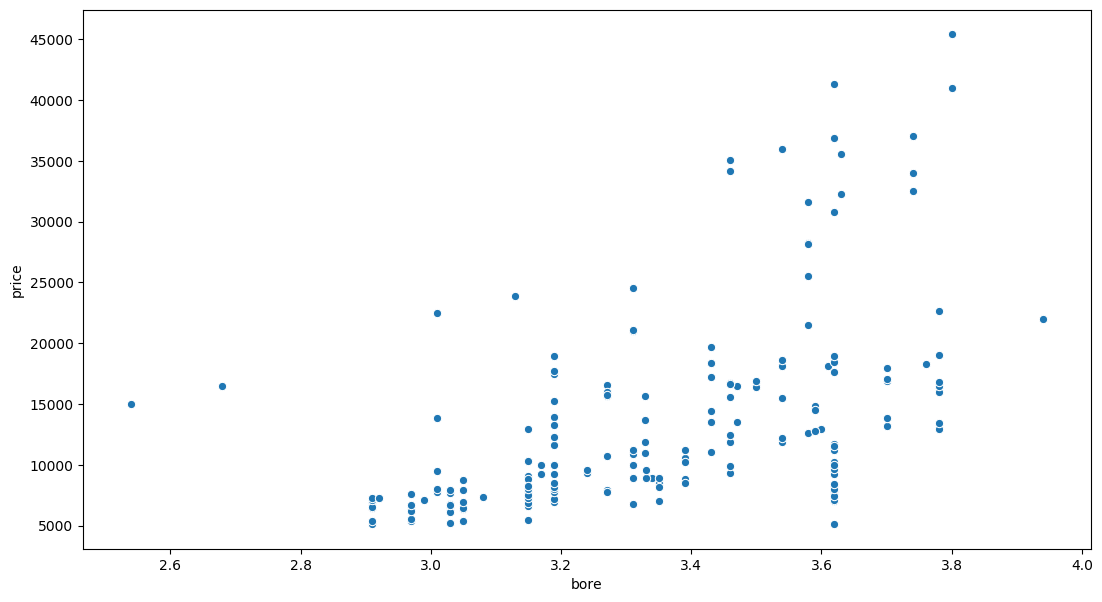

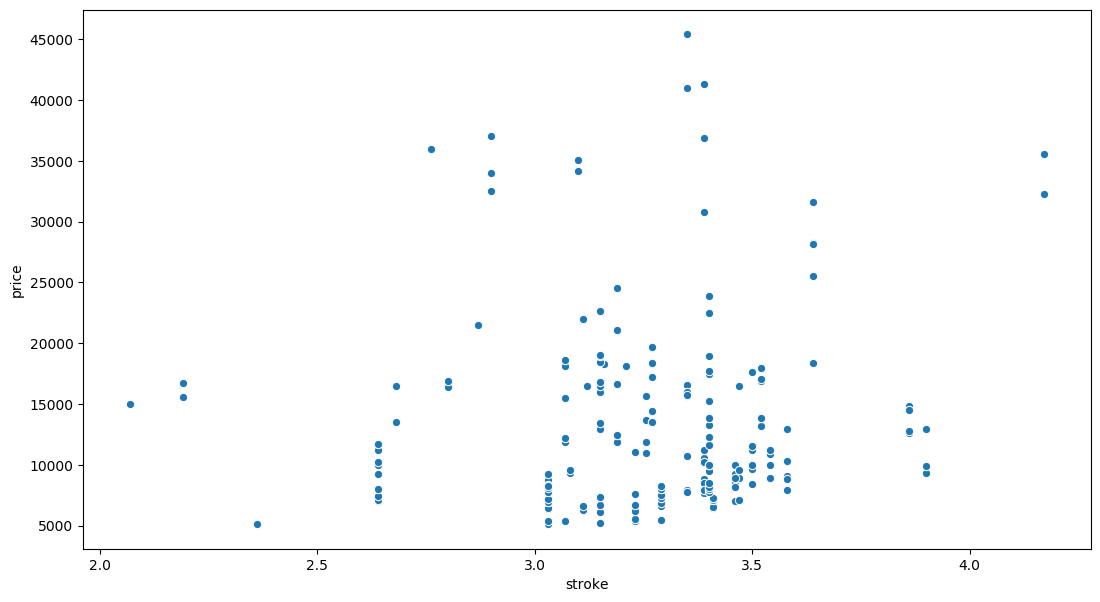

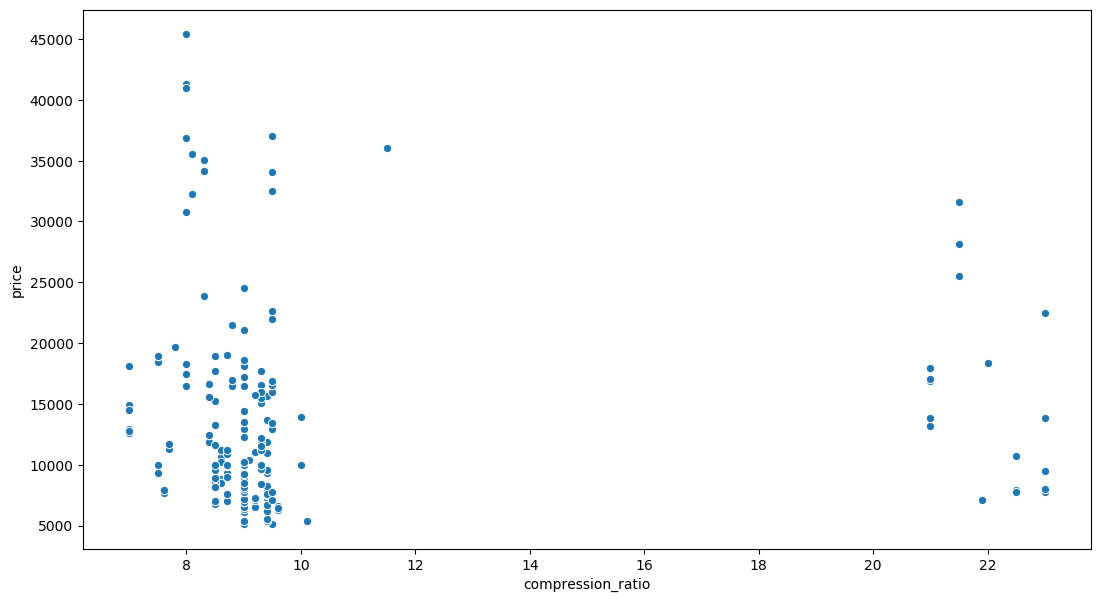

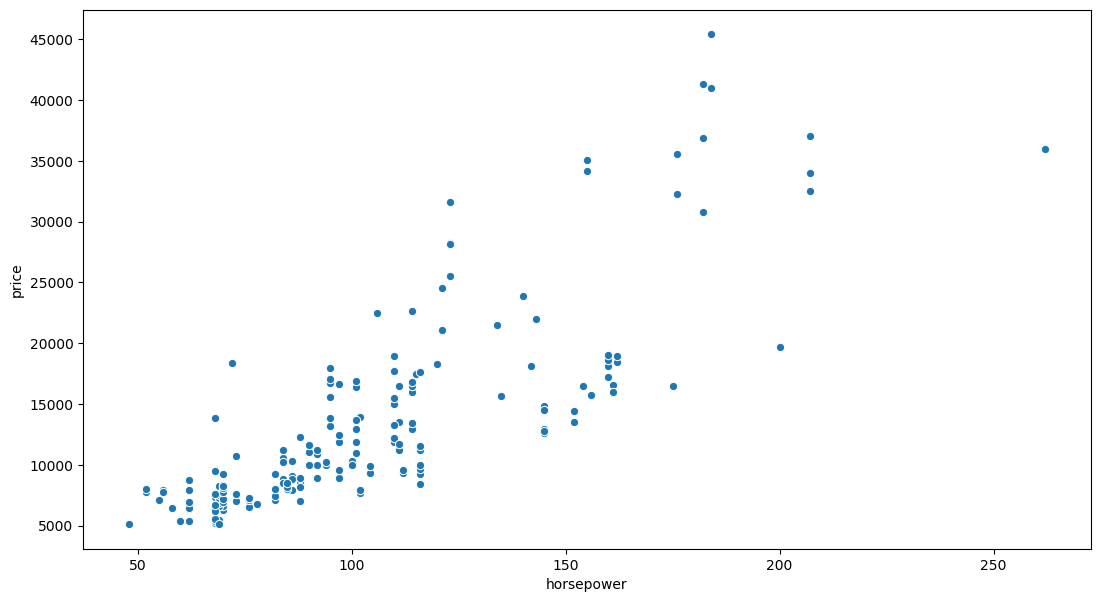

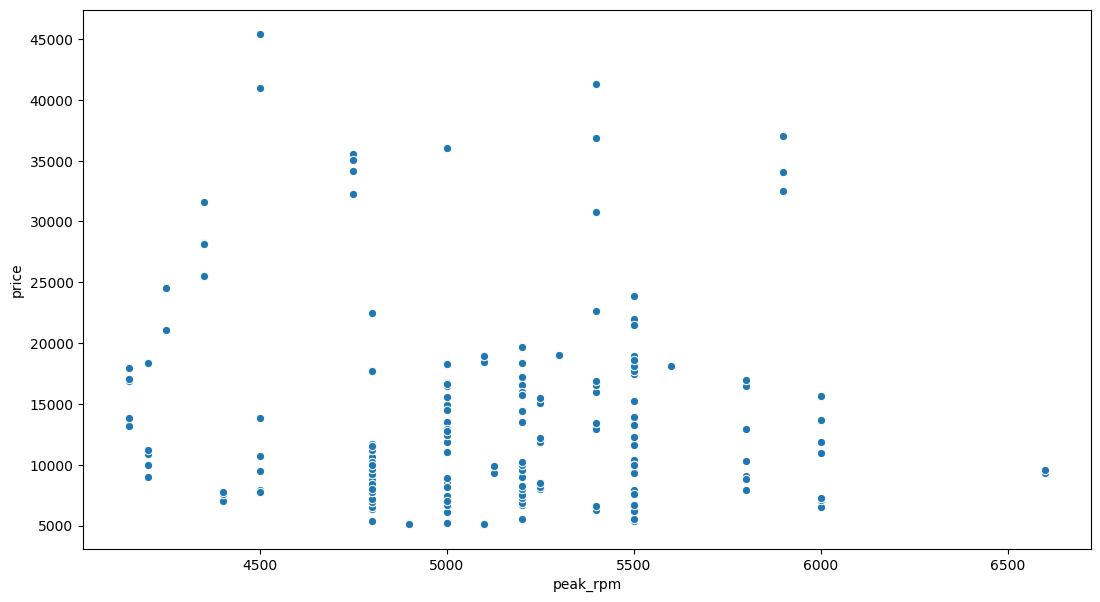

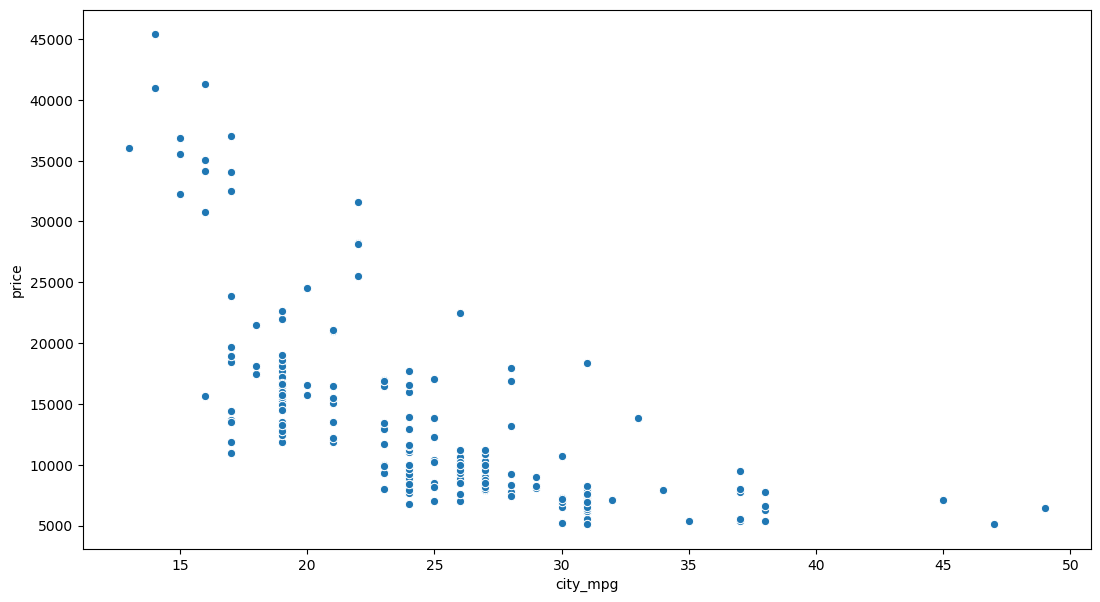

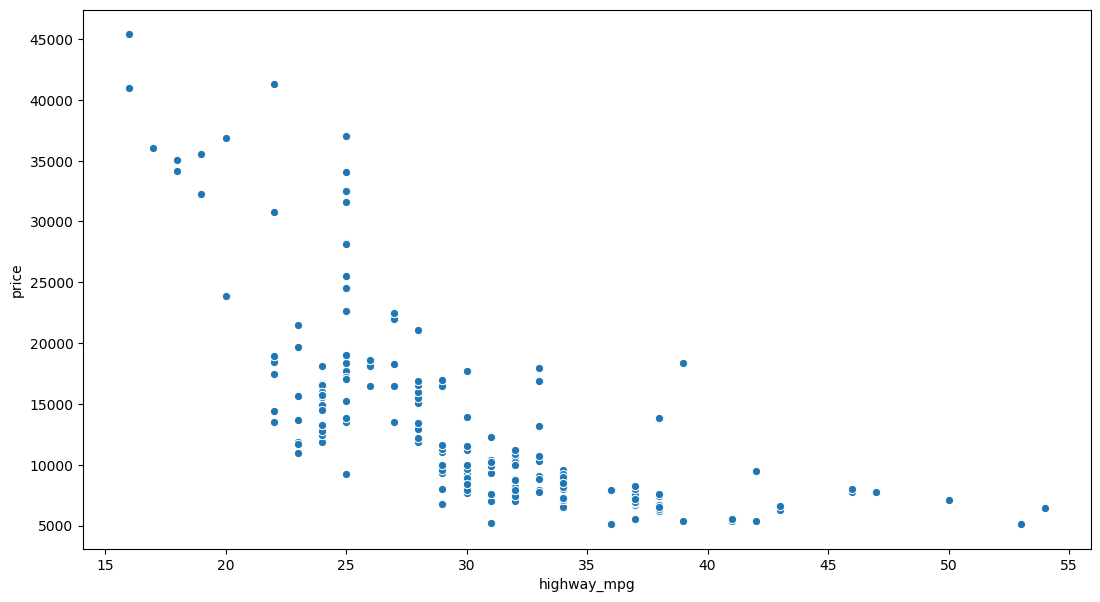

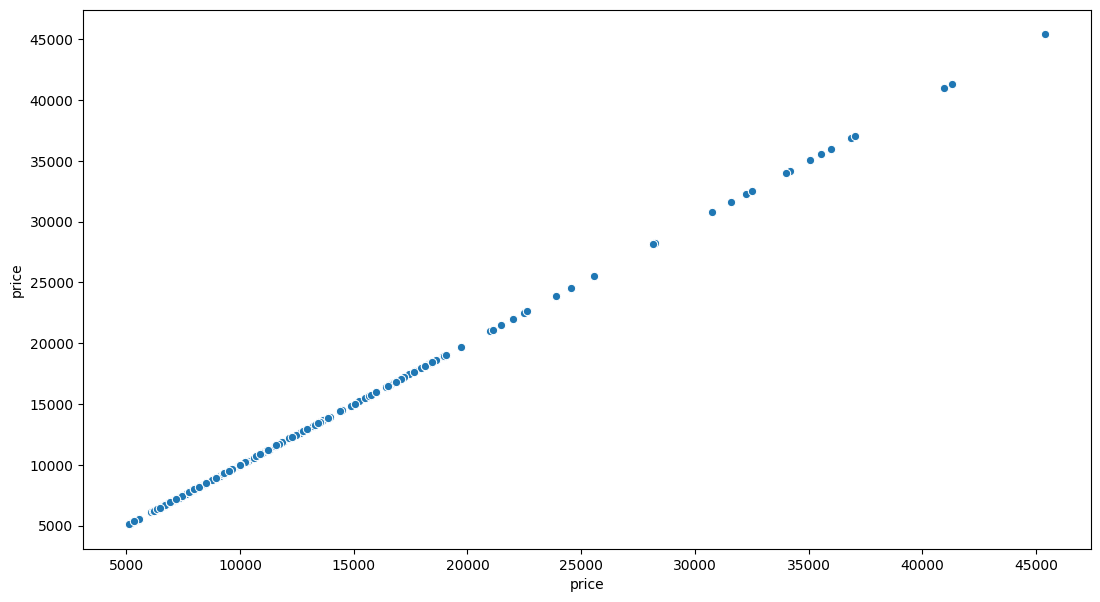

In [55]:
# scatterplot
# here we can see the correlation
# for example, we can see that as length increases, the price increases
# city-mpg has a negative correlation on price. the higher the city-mpg, the lower the price
# num-doors does not seem to have any correlation with price. 
# there can be low-priced cars as well as high-priced ones for 2 or 4 door cars

for i in data.columns:
    plt.figure(figsize = (13, 7))
    sns.scatterplot(x = i, y = 'price',  data = data)
plt.show()

In [56]:
# encoding + one-hot encoding for categorical columns
# categorical_columns
# categorical_column_names

data = pd.get_dummies(data, columns = categorical_column_names)
data.rename(columns = {'make_alfa-romero':'make_alfa_romero'}, inplace = True)
data.rename(columns = {'make_mercedes-benz':'make_mercedes_benz'}, inplace = True)
data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                199 non-null    int64  
 1   normalized_losses        199 non-null    float64
 2   wheel_base               199 non-null    float64
 3   length                   199 non-null    float64
 4   width                    199 non-null    float64
 5   height                   199 non-null    float64
 6   curb_weight              199 non-null    int64  
 7   engine_size              199 non-null    int64  
 8   bore                     199 non-null    float64
 9   stroke                   199 non-null    float64
 10  compression_ratio        199 non-null    float64
 11  horsepower               199 non-null    float64
 12  peak_rpm                 199 non-null    float64
 13  city_mpg                 199 non-null    int64  
 14  highway_mpg              1

In [58]:
# handling the dummy variable trap

# data.drop(['make_volvo','fuel-type_gas','aspiration_turbo','num-of-doors_two','body-style_wagon',
#           'drive-wheels_rwd','engine-location_rear','engine-type_rotor','num-of-cylinders_two',
#           'fuel-system_spfi'], axis = 1, inplace = True)

In [59]:
# scaling for numeric columns

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data[numeric_column_names_except_target] = scaler.fit_transform(data[numeric_column_names_except_target])

In [60]:
data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# features and label

X = data.drop(['price'], axis = 1)
y = data['price']
# X
# y

In [62]:
# train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
# X_train
X_test.info()
# y_train
# y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 51 to 148
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                40 non-null     int64  
 1   normalized_losses        40 non-null     float64
 2   wheel_base               40 non-null     float64
 3   length                   40 non-null     float64
 4   width                    40 non-null     float64
 5   height                   40 non-null     float64
 6   curb_weight              40 non-null     int64  
 7   engine_size              40 non-null     int64  
 8   bore                     40 non-null     float64
 9   stroke                   40 non-null     float64
 10  compression_ratio        40 non-null     float64
 11  horsepower               40 non-null     float64
 12  peak_rpm                 40 non-null     float64
 13  city_mpg                 40 non-null     int64  
 14  highway_mpg              4

In [64]:
# linear regression using sklearn

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_pred_linear = linear_regressor.predict(X_test)

In [65]:
# linear regression metrics
# got extremely poor metrics with scaling
# bad metrics without scaling as well but better than with scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high

n = len(X_test) # number of samples
k = X_test.shape[1] # number of features in the sample set

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_linear)
mse = metrics.mean_squared_error(y_test, y_test_pred_linear)
rmse = metrics.mean_squared_error(y_test, y_test_pred_linear, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_linear)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling - EXTREMELY POOR

# mae: 341448479914835.4
# mse: 2.739411292448198e+30
# rmse: 1655116700552622.0
# r_squared:-5.0681090110711715e+22
# adjusted_r_squared: 7.906250057271028e+22


# without scaling

# mae: 2880.1259518943825
# mse: 28204383.943942167
# rmse: 5310.77997510179
# r_squared:0.5416017854490166
# adjusted_r_squared: 1.715101214699534

mae: 2828.6683268017805
mse: 22556101.38466793
rmse: 4749.326413784162
r_squared:0.7625990262529483
adjusted_r_squared: 1.2645325136038577


In [66]:
# decision tree using sklearn

from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 100)
decision_tree_regressor.fit(X_train, y_train)
y_test_pred_dt = decision_tree_regressor.predict(X_test)

In [67]:
# decision tree regression metrics
# slightly better metrics without scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# r_squared is better in linear. mae, rmse is better in decision tree
# decision tree, random forest etc work better in larger samples. they could overfit in smaller samples

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_dt)
mse = metrics.mean_squared_error(y_test, y_test_pred_dt)
rmse = metrics.mean_squared_error(y_test, y_test_pred_dt, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_dt)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1718.3875
# mse: 5946545.20625
# rmse: 2438.5539170274665
# r_squared:0.8899846130166027
# adjusted_r_squared: 1.1716240036940997


# without scaling

# mae: 1688.4
# mse: 7149545.4
# rmse: 2673.8633846926436
# r_squared:0.8838003746961786
# adjusted_r_squared: 1.1812714154739614

mae: 2232.925
mse: 11315137.975
rmse: 3363.7981471842213
r_squared:0.8809091727538895
adjusted_r_squared: 1.132701207502809


In [68]:
# random forest using sklearn

from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state = 12)
random_forest_regressor.fit(X_train, y_train)
y_test_pred_rf = random_forest_regressor.predict(X_test)

In [69]:
# random forest regression metrics
# better metrics without scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# this is the best model so far

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_rf)
mse = metrics.mean_squared_error(y_test, y_test_pred_rf)
rmse = metrics.mean_squared_error(y_test, y_test_pred_rf, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_rf)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1614.9289624999997
# mse: 4686009.391844128
# rmse: 2164.7192408818582
# r_squared:0.9133054372293807
# adjusted_r_squared: 1.135243517922166

# without scaling

# mae: 1073.3567083333332
# mse: 2220170.1759186806
# rmse: 1490.0235487799114
# r_squared:0.9639161753483697
# adjusted_r_squared: 1.0562907664565433

mae: 1616.6077083333334
mse: 5493478.045114791
rmse: 2343.8169820006833
r_squared:0.9421816290445131
adjusted_r_squared: 1.064426184778971


In [ ]:
# let us package this random forest model

import pickle
pickle.dump(random_forest_regressor, open('random_forest_regressor.pkl', 'wb'))
random_forest_regressor_pkl = pickle.load(open('random_forest_regressor.pkl','rb'))

y_test_pred_rf_pkl = random_forest_regressor_pkl.predict(X_test)

In [ ]:
!pip install xgboost

In [ ]:
# xgboost regression using sklearn

import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 70)
xgb_regressor.fit(X_train, y_train)
y_test_pred_xgb_skl = xgb_regressor.predict(X_test)

In [ ]:
# xgb regression metrics
# better metrics without scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# this model is as good as random forest model

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_xgb_skl)
mse = metrics.mean_squared_error(y_test, y_test_pred_xgb_skl)
rmse = metrics.mean_squared_error(y_test, y_test_pred_xgb_skl, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_xgb_skl)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1674.6705322265625
# mse: 5732040.92997775
# rmse: 2394.1681081281135
# r_squared:0.893953097261687
# adjusted_r_squared: 1.1654331682717682

# without scaling

# mae: 1120.7487670898438
# mse: 2344952.2819912257
# rmse: 1531.3237025499297
# r_squared:0.9618881255691136
# adjusted_r_squared: 1.0594545241121827

In [ ]:
# Grid Search and find the best model for XGB sklearn

from sklearn.model_selection import GridSearchCV

import xgboost as xgb

model = xgb.XGBRegressor()

parameters_grid = {
                    'max_depth': [5, 12, 20],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'n_estimators': [40, 100, 150, 210],
                    'colsample_bytree': [0.3, 0.7]                
                  }

xgb_gridsearch_regressor = GridSearchCV(
                                        estimator = model, 
                                        param_grid = parameters_grid,
                                        scoring = 'neg_mean_squared_error',  
                                        cv = 5, 
                                        verbose = 5
                                        )

xgb_gridsearch_regressor.fit(X_train, y_train)

xgb_gridsearch_regressor.best_params_

xgb_gridsearch_regressor.best_estimator_

y_test_pred_gs_xgb_skl = xgb_gridsearch_regressor.predict(X_test)

In [ ]:
# grid search xgb regression metrics
# better metrics without scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# this model is as good as random forest model and the xgboost model without grid search / hyper param tuning

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_gs_xgb_skl)
mse = metrics.mean_squared_error(y_test, y_test_pred_gs_xgb_skl)
rmse = metrics.mean_squared_error(y_test, y_test_pred_gs_xgb_skl, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_gs_xgb_skl)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1255.1245239257812
# mse: 3455015.189443725
# rmse: 1858.7671154406958
# r_squared:0.9360797202549364
# adjusted_r_squared: 1.0997156364022993

# without scaling

# mae: 1043.07587890625
# mse: 1901365.0879912735
# rmse: 1378.8999557586742
# r_squared:0.9690976281106833
# adjusted_r_squared: 1.048207700147334

In [ ]:
# X_test.head()
# data.head()
X_test.info()

In [ ]:
# now that we have got the best model for the dataset, let us package it

import pickle
pickle.dump(xgb_gridsearch_regressor, open('xgb_gridsearch_regressor.pkl', 'wb'))
xgb_gridsearch_regressor_pkl = pickle.load(open('xgb_gridsearch_regressor.pkl','rb'))

y_test_pred_gs_xgb_skl_pkl = xgb_gridsearch_regressor_pkl.predict(X_test)

In [ ]:
# Similar to GridSearchCV hyperparameter tuning, there are RandomizedSearchCV, BayesSearchCV methods as well
# Refer Regression_XGBoost_Sklearn.ipynb for their implementation

In [ ]:
# Summarizing for sklearn models, we can go with Random Forest or XG Boost
# We can predict the car price to a RMSE of ~2000$, R2 ~0.92

In [ ]:
# Model deployment
# Refer C:\Vinod\AWSSagemaker\Deployment\car_price_predictor.py for the Flask API deployment of the trained model
# Refer C:\Vinod\AWSSagemaker\Deployment\Sample Postman Request.docx for sample Postman request

In [ ]:
# XG Boost Sagemaker

In [ ]:
# sagemaker and s3 setup

import sagemaker
import boto3
import io
import os
import sagemaker.amazon.common as smac

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
print('The role is ', role)

bucket = 'vinod-ml-sagemaker-bucket'
prefix = 'regression-capstone-car-price'
key = 'regressor-capstone-car-price'

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('The model artifacts will be uploaded to ', output_location)

In [ ]:
# setting up the data as needed for sagemaker

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')
X.shape
y.shape
y = y.reshape(-1,1)
y.shape

In [ ]:
# train, test, val split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)
X_train.shape
y_train.shape
X_test.shape
y_test.shape
X_val.shape
y_val.shape

In [ ]:
# label as first column

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]
    
train_data
train_data.shape

test_data = pd.DataFrame({'Target': y_test[:,0]})
for i in range(X_test.shape[1]):
    test_data[i] = X_test[:,i]
    
test_data
test_data.shape

val_data = pd.DataFrame({'Target': y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_test[:,i]
    
val_data
val_data.shape

train_data.to_csv('regression_capstone_car_price_train.csv', header = False, index = False)
test_data.to_csv('regression_capstone_car_price_test.csv', header = False, index = False)
val_data.to_csv('regression_capstone_car_price_val.csv', header = False, index = False)

In [ ]:
# upload training data into s3

import os
with open('regression_capstone_car_price_train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

# upload testing data into s3

import os
with open('regression_capstone_car_price_test.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(f)

s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded testing data location: {}'.format(s3_test_data))

# upload validation data into s3

import os
with open('regression_capstone_car_price_val.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'val', key)).upload_fileobj(f)

s3_val_data = 's3://{}/{}/val/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_val_data))

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'csv', s3_data_type = 'S3Prefix')
test_input = sagemaker.session.TrainingInput(s3_data = s3_test_data, content_type = 'csv', s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_val_data, content_type = 'csv', s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}

In [ ]:
# sagemaker xgboost regression model and training job

container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name,  version='1.0-1')

xgboost_sagemaker = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


xgboost_sagemaker.set_hyperparameters(max_depth = 15,
                           objective = 'reg:squarederror',
                           colsample_bytree = 0.3,
                           alpha = 2,
                           eta = 0.05,
                           num_round = 200)

xgboost_sagemaker.fit(data_channels)

In [ ]:
# xgboost sagemaker deploy and test the model

from sagemaker.predictor import csv_serializer, json_deserializer

xgboost_sagemaker_car_price_regressor = xgboost_sagemaker.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')
xgboost_sagemaker_car_price_regressor.serializer = csv_serializer

predictions = xgboost_sagemaker_car_price_regressor.predict(X_test)
predictions

In [ ]:
def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    # same thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)

In [ ]:
y_test_pred_xgb_sgm = bytes_2_array(predictions)

In [ ]:
# xgb sagemaker regression metrics
# better metrics without scaling
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# sklearn xgboost seems to give better results

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_xgb_sgm)
mse = metrics.mean_squared_error(y_test, y_test_pred_xgb_sgm)
rmse = metrics.mean_squared_error(y_test, y_test_pred_xgb_sgm, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_xgb_sgm)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1767.4299
# mse: 7599774.5
# rmse: 2756.7688
# r_squared:0.9010604156510177
# adjusted_r_squared: 1.1543457515844124

# without scaling

# mae: 1356.6128
# mse: 3168216.0
# rmse: 1779.9484
# r_squared:0.9434444428594699
# adjusted_r_squared: 1.0882266691392268

In [ ]:
# Grid Search and find the best model for XGB sagemaker

In [ ]:
# creating hyper-parameter ranges within which model can be tuned

from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {
                        'max_depth': IntegerParameter(10, 20),
                        'colsample_bytree': ContinuousParameter(0.1, 0.9),
                        'alpha': ContinuousParameter(0.1, 0.9),
                        'eta': ContinuousParameter(0.1, 0.9),
                        'min_child_weight': ContinuousParameter(5, 10)
                        }

In [ ]:
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name,  version='1.0-1')

xgboost_tuned_sagemaker = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       input_mode = 'File',
                                       use_spot_instances = True, 
                                       max_run = 300, # Timeout in seconds for training (default: 24 * 60 * 60). After this amount of time Amazon SageMaker terminates the job regardless of its current status.
                                       max_wait = 600, # Timeout in seconds waiting for spot training job (default: None). After this amount of time Amazon SageMaker will stop waiting for managed spot training job to complete (default: None).
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

xgboost_tuned_sagemaker.set_hyperparameters(objective = 'reg:squarederror',
                                      early_stopping_rounds = 10,
                                      num_round = 200)

tuner = HyperparameterTuner(xgboost_tuned_sagemaker,
                            objective_metric_name = 'validation:rmse',
                            hyperparameter_ranges = hyperparameter_ranges,
                            objective_type =  'Minimize', 
                            max_jobs = 5,
                            max_parallel_jobs = 1)

tuner.fit(data_channels)

In [ ]:
tuned_xgboost_sagemaker_car_price_regressor = tuner.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer
tuned_xgboost_sagemaker_car_price_regressor.serializer = csv_serializer

new_predictions = tuned_xgboost_sagemaker_car_price_regressor.predict(X_test)
new_predictions

y_test_pred_xgb_tuned_sgm = bytes_2_array(new_predictions)
y_test_pred_xgb_tuned_sgm

In [ ]:
# xgb tuned sagemaker regression metrics
# without scaling is better
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# this is giving very poor results - 
# maybe i should try increaing or removing altogether num_round, early_stopping_rounds

n = len(X_test)
k = X_test.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred_xgb_tuned_sgm)
mse = metrics.mean_squared_error(y_test, y_test_pred_xgb_tuned_sgm)
rmse = metrics.mean_squared_error(y_test, y_test_pred_xgb_tuned_sgm, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred_xgb_tuned_sgm)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 4266.7393
# mse: 36552550.0
# rmse: 6045.8706
# r_squared:0.5241314102567739
# adjusted_r_squared: 1.7423549999994328

# without scaling

# mae: 2519.69
# mse: 13253186.0
# rmse: 3640.4924
# r_squared:0.7634184959243031
# adjusted_r_squared: 1.3690671463580872

In [ ]:
xgboost_sagemaker_car_price_regressor.delete_endpoint()
tuned_xgboost_sagemaker_car_price_regressor.delete_endpoint()

In [ ]:
# autogluon

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install -U scikit-learn==0.24.2
!pip install -U psutil

!pip install autogluon --no-cache-dir --ignore-installed PyYAML
from autogluon.tabular import TabularDataset, TabularPredictor

# !pip show scikit-learn

In [ ]:
try:
    import autogluon
    print('autogluon is installed')
except ImportError as e:
    print('autogluon not installed')

In [ ]:
# !pip install autogluon --no-cache-dir --ignore-installed PyYAML
# from autogluon.tabular import TabularDataset, TabularPredictor
# 0.22.1

# !pip install -U scikit-learn==0.24.2
# !pip install -U psutil
# !pip show scikit-learn
# # print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
# Note that this is not the same as the previous train_test_split
# Here X_train and X_test have the labels also

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size = 0.2)

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label = "price", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);
plt.show()

In [ ]:
# X_test
y_test_ag = X_test['price']
X_test_ag = X_test.drop(['price'], axis = 1)

y_test_pred_autogluon = predictor.predict(X_test_ag)
y_test_pred_autogluon

In [ ]:
# autogluon regression metrics
# without scaling is better
# adjusted r squared is greater than 1. 
# This is happening because data size is small and the number of feature columns is high
# This is the best result so far - autogluon has tried many models and the best model turned out to be weightedensemble_l2 with r2 score of 0.94
# for the below set, we got r2 of 0.96 !

n = len(X_test_ag)
k = X_test_ag.shape[1]

# n
# k

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test_ag, y_test_pred_autogluon)
mse = metrics.mean_squared_error(y_test_ag, y_test_pred_autogluon)
rmse = metrics.mean_squared_error(y_test_ag, y_test_pred_autogluon, squared = False)
r_squared = metrics.r2_score(y_test_ag, y_test_pred_autogluon)
adjusted_r_squared=1-(((1-r_squared)*(n-1))/(n-k-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# with scaling

# mae: 1329.1794189453126
# mse: 3177901.8014270305
# rmse: 1782.6670472713154
# r_squared:0.9194616994801666
# adjusted_r_squared: 1.12563974881094

# without scaling

# mae: 766.69775390625
# mse: 1092818.359427929
# rmse: 1045.3795288927026
# r_squared:0.9636702709104488
# adjusted_r_squared: 1.0566743773796998